In [1]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# boston市の住宅価格のデータセット
# 参考: https://scikit-learn.org/stable/datasets/index.html#boston-dataset
boston = load_boston()

In [3]:
# DataFrameに変換
# 参考: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df["PRICE"] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# DataFrameの統計情報を見てみる
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
# 欠損値などは大丈夫？
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


## それぞれのカラムの意味について
https://scikit-learn.org/stable/datasets/index.html#boston-dataset

- CRIM : 人口1人あたりの犯罪(crime) 発生数
- ZN : 25,000平方フィート以上の住居区画の占める割合
- INDUS : 小売業以外の商業が占める面積の割合
- CHAS : チャールズ川の周辺であれば1, それ以外は0
- NOX : NOxの濃度
- RM : 住居の平均部屋数
- AGE : 1940年より前に建てられた物件の割合
- DIS : ボストン市の5つの雇用施設からの距離
- RAD : 環状高速道路へのアクセスしやすさ
- TAX : 10,000ドルあたりの不動産税率の総計
- PTRATIO : 街毎の児童と教師の比率
- B : 街毎の黒人(Bk)の比率を次の式で表したもの．1000(Bk - 0.63)^2
- LSTAT : 給与の低い職業に従事する人口の割合 (%)

/Users/a14752/.pyenv/versions/3.7.1/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


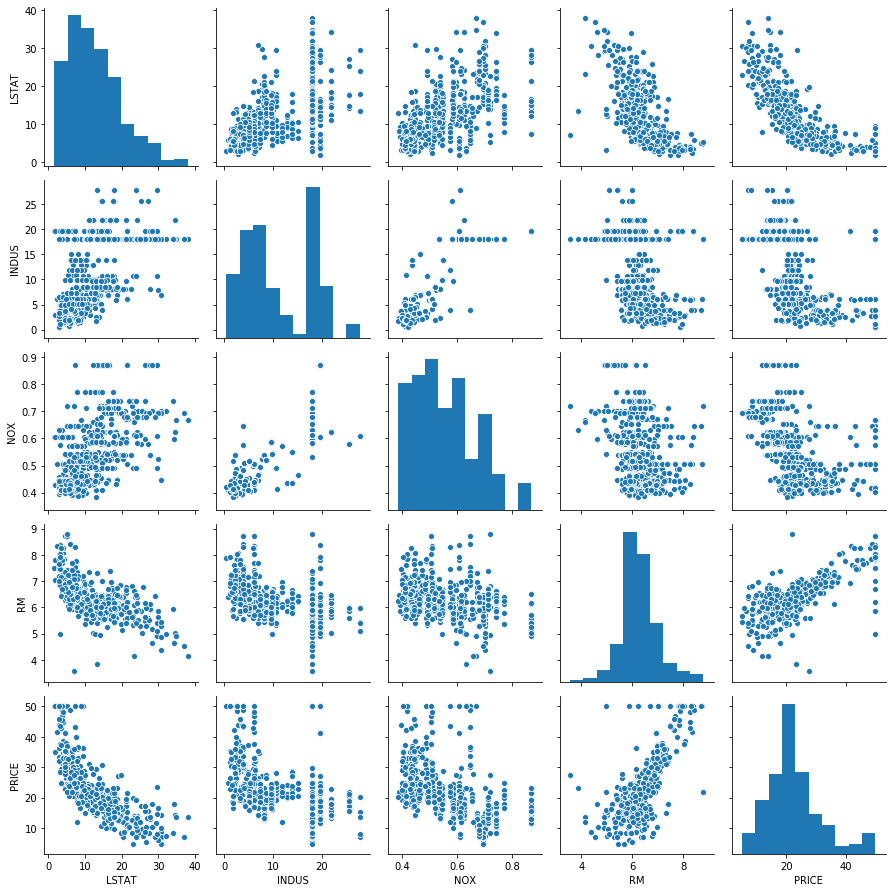

In [6]:
# どの特徴量 (feature) がPRICEの予測に効いているだろうか？
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'PRICE']

# 参考: https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.pairplot(df[cols], size=2.5)
plt.tight_layout()
plt.show()

In [7]:
# 部屋数をX, 価格をyに代入
X = df['RM']
y = df['PRICE']

In [1]:
# 列ベクトルに変換
#  データがN個ならNx1
X = np.array(X).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

NameError: name 'np' is not defined

In [2]:
# 訓練データとテストデータに分割
# 本来は未知のデータについての精度を知りたい ← 擬似的にその環境を作り出す
# 訓練データしか学習には使わない！ テストデータは評価にのみ使う
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

NameError: name 'train_test_split' is not defined

In [10]:
# 線形回帰モデルによる学習
# 参考: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
# 係数
print("w0 = {}, w1 = {}".format(model.intercept_, model.coef_))

w0 = [-38.73917872], w1 = [[9.73947481]]


Text(0.5, 1.0, 'X_train ver')

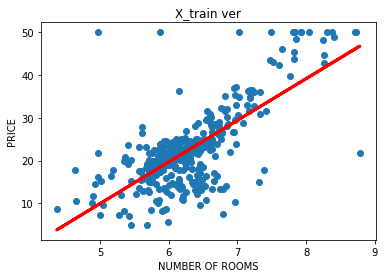

In [12]:
y_train_pred = model.predict(X_train)
plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred, "r", lw=3)
plt.ylabel("PRICE")
plt.xlabel("NUMBER OF ROOMS")
plt.title("X_train ver")

In [13]:
# 訓練データの平均二乗誤差
# 参考: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
print("MSE : {}".format(mean_squared_error(y_train, y_train_pred)))

MSE : 41.657965653177506


Text(0.5, 1.0, 'X_test ver')

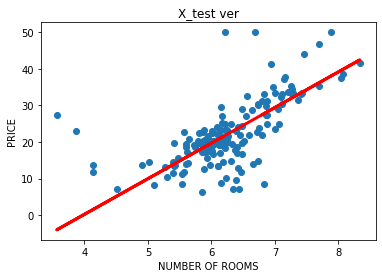

In [14]:
y_test_pred = model.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, "r", lw=3)
plt.ylabel("PRICE")
plt.xlabel("NUMBER OF ROOMS")
plt.title("X_test ver")

In [15]:
# テストデータの平均二乗誤差
print("MSE : {}".format(mean_squared_error(y_test, y_test_pred)))

MSE : 48.80421214155872
